In [1]:
import meso_tools as mt
import os
import numpy as np
import matplotlib.pyplot as pl
import tifffile
import sciris as sc

In [3]:
four_roi_stack= 'E:\\dev_data\\OS_dendrites_stacks_pilots\\4roi_comparison_data\\617911_surface_soma_4ROIS_00001.tif'

if not os.path.isfile(four_roi_stack):
    print(f"!!!! 4 ROI stack was deleted! restore it before proceeding!!!!")

In [13]:
#1. open tiff file
tiff=tifffile.TiffFile(four_roi_stack, mode='rb')

In [4]:
num_frames = len(tiff.pages)

In [5]:
#stack parameters
ROIs = 4
image_dim = 768
spacer = 24

chunk_size = 100
chunk_num = int(np.ceil(num_frames / chunk_size))
# allocation of output vector
average_fluorescence = np.zeros((num_frames,))

curr_frame = 0
print(f"Stack will be processed in {chunk_num} chunks")

Stack will be processed in 525 chunks


In [6]:
# 2. Initiallize arrays for averaged stacks, mean and variance outputs
V1 = np.zeros((int(num_frames/chunk_size), image_dim , image_dim ))
LM = np.zeros((int(num_frames/chunk_size), image_dim , image_dim ))
PM = np.zeros((int(num_frames/chunk_size), image_dim , image_dim ))
AM = np.zeros((int(num_frames/chunk_size), image_dim , image_dim ))

mean = np.zeros((ROIs, int(num_frames/chunk_size)))
var = np.zeros((ROIs, int(num_frames/chunk_size)))

In [14]:
# 3. loop over chunks to generate averaged stack and calculate mean and variance

for i in range(chunk_num):

    # load chunk of tiff:
    frame_start = chunk_size*i
    frame_end = chunk_size*(i+1)

    # handling of the last chunk 
    if frame_end > num_frames:
        frame_end = num_frames
    print(f'Loading {i}th chunk, frames {frame_start} to {frame_end}')
    tiff_array = tiff.asarray(range(frame_start,frame_end))

    num_frames_chunk = tiff_array.shape[0]

    # split and average 4 rois - single planes
    V1[i,:,:] = tiff_array[:,:image_dim,:].mean(axis=0)
    LM[i,:,:] = tiff_array[:,image_dim+spacer:2*image_dim+spacer,:].mean(axis=0)
    AM[i,:,:] = tiff_array[:,2*image_dim+2*spacer:3*image_dim+2*spacer,:].mean(axis=0)
    PM[i,:,:] = tiff_array[:,3*image_dim+3*spacer:,:].mean(axis=0)
    
    mean[0,i] = np.mean(V1[i,:,:],axis=(0,1))
    mean[1,i] = np.mean(LM[i,:,:],axis=(0,1))
    mean[2,i] = np.mean(AM[i,:,:],axis=(0,1))   
    mean[3,i] = np.mean(PM[i,:,:],axis=(0,1))
    var[0,i] = np.var(V1[i,:,:])
    var[1,i] = np.var(LM[i,:,:])        
    var[2,i] = np.var(AM[i,:,:])        
    var[3,i] = np.var(PM[i,:,:])

Loading 0th chunk, frames 0 to 100
Loading 1th chunk, frames 100 to 200
Loading 2th chunk, frames 200 to 300
Loading 3th chunk, frames 300 to 400
Loading 4th chunk, frames 400 to 500
Loading 5th chunk, frames 500 to 600
Loading 6th chunk, frames 600 to 700
Loading 7th chunk, frames 700 to 800
Loading 8th chunk, frames 800 to 900
Loading 9th chunk, frames 900 to 1000
Loading 10th chunk, frames 1000 to 1100
Loading 11th chunk, frames 1100 to 1200
Loading 12th chunk, frames 1200 to 1300
Loading 13th chunk, frames 1300 to 1400
Loading 14th chunk, frames 1400 to 1500
Loading 15th chunk, frames 1500 to 1600
Loading 16th chunk, frames 1600 to 1700
Loading 17th chunk, frames 1700 to 1800
Loading 18th chunk, frames 1800 to 1900
Loading 19th chunk, frames 1900 to 2000
Loading 20th chunk, frames 2000 to 2100
Loading 21th chunk, frames 2100 to 2200
Loading 22th chunk, frames 2200 to 2300
Loading 23th chunk, frames 2300 to 2400
Loading 24th chunk, frames 2400 to 2500
Loading 25th chunk, frames 2500

Loading 198th chunk, frames 19800 to 19900
Loading 199th chunk, frames 19900 to 20000
Loading 200th chunk, frames 20000 to 20100
Loading 201th chunk, frames 20100 to 20200
Loading 202th chunk, frames 20200 to 20300
Loading 203th chunk, frames 20300 to 20400
Loading 204th chunk, frames 20400 to 20500
Loading 205th chunk, frames 20500 to 20600
Loading 206th chunk, frames 20600 to 20700
Loading 207th chunk, frames 20700 to 20800
Loading 208th chunk, frames 20800 to 20900
Loading 209th chunk, frames 20900 to 21000
Loading 210th chunk, frames 21000 to 21100
Loading 211th chunk, frames 21100 to 21200
Loading 212th chunk, frames 21200 to 21300
Loading 213th chunk, frames 21300 to 21400
Loading 214th chunk, frames 21400 to 21500
Loading 215th chunk, frames 21500 to 21600
Loading 216th chunk, frames 21600 to 21700
Loading 217th chunk, frames 21700 to 21800
Loading 218th chunk, frames 21800 to 21900
Loading 219th chunk, frames 21900 to 22000
Loading 220th chunk, frames 22000 to 22100
Loading 221

Loading 388th chunk, frames 38800 to 38900
Loading 389th chunk, frames 38900 to 39000
Loading 390th chunk, frames 39000 to 39100
Loading 391th chunk, frames 39100 to 39200
Loading 392th chunk, frames 39200 to 39300
Loading 393th chunk, frames 39300 to 39400
Loading 394th chunk, frames 39400 to 39500
Loading 395th chunk, frames 39500 to 39600
Loading 396th chunk, frames 39600 to 39700
Loading 397th chunk, frames 39700 to 39800
Loading 398th chunk, frames 39800 to 39900
Loading 399th chunk, frames 39900 to 40000
Loading 400th chunk, frames 40000 to 40100
Loading 401th chunk, frames 40100 to 40200
Loading 402th chunk, frames 40200 to 40300
Loading 403th chunk, frames 40300 to 40400
Loading 404th chunk, frames 40400 to 40500
Loading 405th chunk, frames 40500 to 40600
Loading 406th chunk, frames 40600 to 40700
Loading 407th chunk, frames 40700 to 40800
Loading 408th chunk, frames 40800 to 40900
Loading 409th chunk, frames 40900 to 41000
Loading 410th chunk, frames 41000 to 41100
Loading 411

In [41]:
def align_phase_stack(stack):
    """
    fucntion to align phase in images in stack: calculate mean offset for all images, 
        apply same value to all images in stack
    Inputs:
        stack: 3D numpy array representing stack
    Returns:
        stack_aligned: 3D numpy array representing stack, but aligned
    """
    # calculate mean offset in the stack:
    offsets = []
    for page in stack:
        offset = mt.alig_phase(page, do_align = False)
        offsets.append(offset)
    mean_offset = int(np.round(np.mean(offsets)))
    max_offset = np.max(offsets)
    # align all images in stack using mean offset: 
    stack_aligned = np.zeros((stack.shape[0], stack.shape[1], stack.shape[2]-offset+1))
    
    if mean_offset !=0:
        offset = mean_offset
    else:
        offset = max_offset
    
    for i, page in enumerate(stack):
        _, page_aligned = aling_phase(page, offset = offset)
        stack_aligned[i] = page_aligned
    return stack_aligned

In [43]:
# tiff.close()

V1 =align_phase_stack(V1)
# LM =mt.align_phase_stack(LM)
# AM =mt.align_phase_stack(AM)
# PM =mt.align_phase_stack(PM)

NameError: name 'aling_phase' is not defined

In [37]:
offset, a = mt.aling_phase(V1[172,:,:])

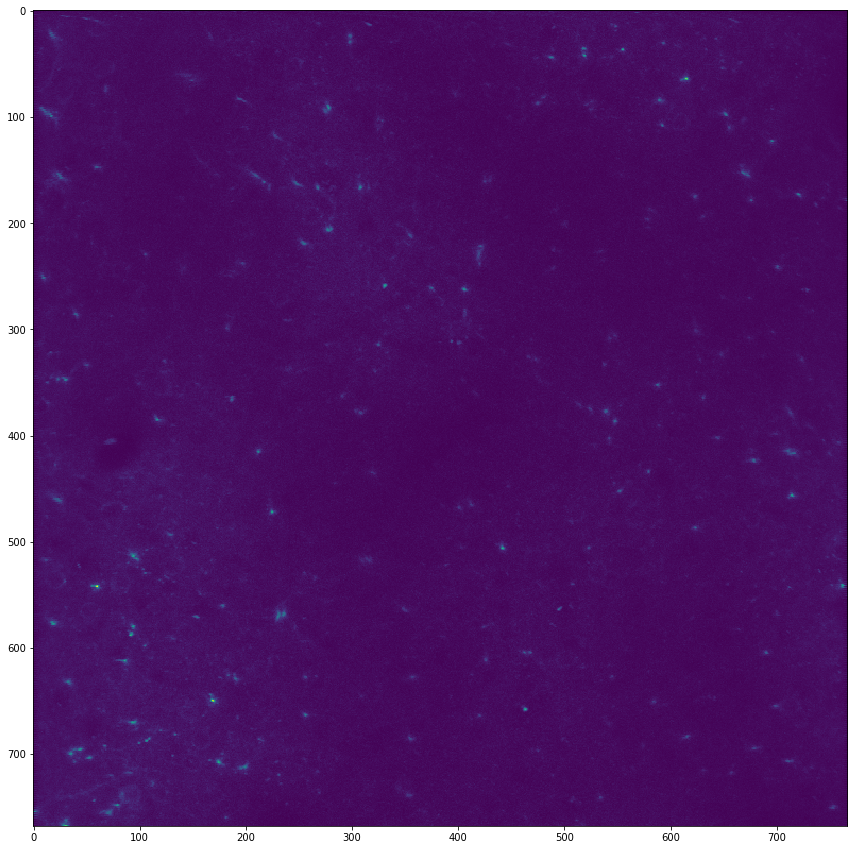

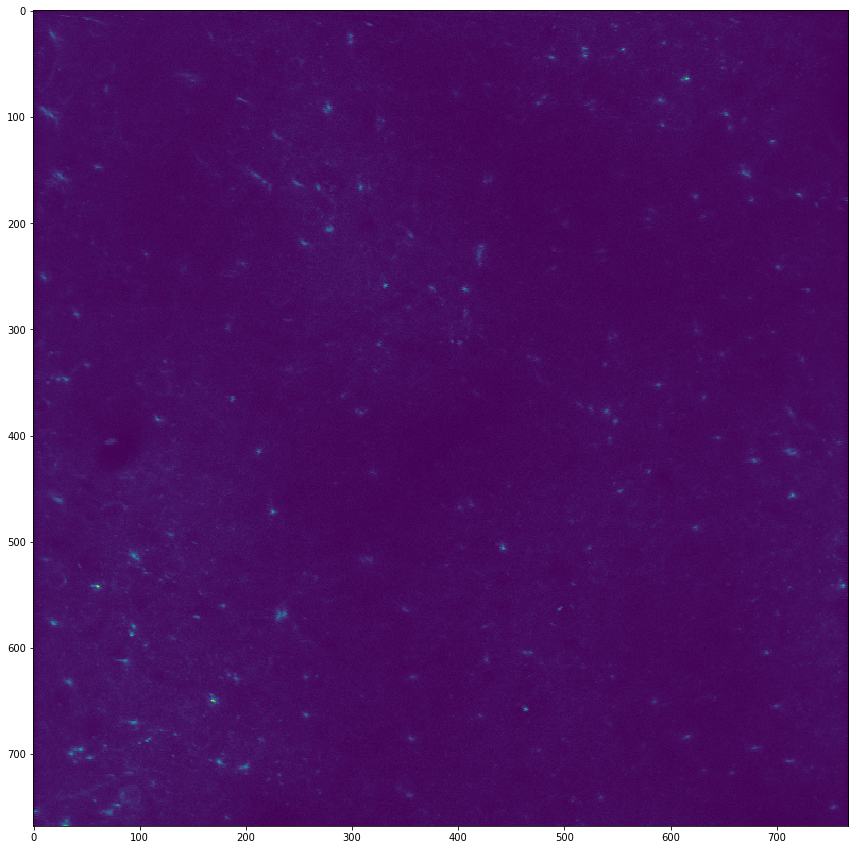

In [39]:
pl.figure(figsize=[15,15])
pl.imshow(a, interpolation='none')
pl.figure(figsize=[15,15])
pl.imshow(V1[172], interpolation='none')

In [25]:
V1[i,:,:]

array([[881.98, 866.94, 854.28, ..., 852.54, 842.62, 871.4 ],
       [846.84, 859.25, 872.55, ..., 844.93, 836.02, 865.24],
       [839.17, 878.73, 872.59, ..., 863.78, 850.45, 839.92],
       ...,
       [833.66, 838.34, 851.57, ..., 843.8 , 870.04, 836.22],
       [859.12, 845.03, 836.05, ..., 849.99, 854.93, 868.59],
       [839.2 , 854.82, 858.24, ..., 841.51, 836.81, 846.56]])

In [9]:
# 4. write dict with mean and avg data to disk
four_roi_data = {}
four_roi_data['roi0_mean'] = mean[0]
four_roi_data['roi1_mean'] = mean[1]
four_roi_data['roi2_mean'] = mean[2]
four_roi_data['roi3_mean'] = mean[3]

four_roi_data['roi0_var'] = var[0]
four_roi_data['roi1_var'] = var[1]
four_roi_data['roi2_var'] = var[2]
four_roi_data['roi3_var'] = var[3]

path = "E:\\dev_data\\OS_dendrites_stacks_pilots\\4roi_comparison_data\\4_roi_data.dict"
sc.saveobj(path, four_roi_data)

'E:\\dev_data\\OS_dendrites_stacks_pilots\\4roi_comparison_data\\4_roi_data.dict'

In [10]:
# 5. write tiffs of individual averaged frames to disk

v1_path = "E:\\dev_data\\OS_dendrites_stacks_pilots\\4roi_comparison_data\\V1_avg.tiff"
lm_path = "E:\\dev_data\\OS_dendrites_stacks_pilots\\4roi_comparison_data\\LM_avg.tiff"
am_path = "E:\\dev_data\\OS_dendrites_stacks_pilots\\4roi_comparison_data\\AM_avg.tiff"
pm_path = "E:\\dev_data\\OS_dendrites_stacks_pilots\\4roi_comparison_data\\PM_avg.tiff"

mt.write_tiff(v1_path, V1.astype(np.int16))
mt.write_tiff(lm_path, LM.astype(np.int16))
mt.write_tiff(am_path, AM.astype(np.int16))
mt.write_tiff(pm_path, PM.astype(np.int16))

In [26]:
mt.write_tiff(v1_path, V1.astype(np.int16))